# Analyzing the survey about usage and usef# Analyzing the real work usage of the different data documentation approaches

Before using add the "real-world-usage.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [1]:
import math
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from github import Auth, Github
from sentence_transformers import SentenceTransformer

In [2]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0", "#118ab2", "#ef476f", "#fb5607"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]
markers = ["o", "s", "D", "^", "v", "*", "X", "+", "p", "h"]

## Method 2: Find relevant citing resources for full read

## Method 3: GitHub search

In [ ]:
github_access_token = os.getenv("GITHUB_ACCESS_TOKEN")
g = Github(auth=Auth.Token(github_access_token))

In [ ]:
# Last ran on 09/09/2024

# search terms
dict_search = {}
dict_search["Datasheet"] = (
    '"for what purpose was the dataset created" AND "who created the dataset"'
)
dict_search["Healthsheet"] = (
    '"provide a 2 sentence summary of this dataset" AND "has the dataset been audited before"'
)
dict_search["Data Card"] = '"dataset owners" AND "publishers"'
dict_search["Data Nutrition Label"] = '"dataset facts" AND "metadata"'
dict_search["Accountability documentation"] = '"dataset name" AND "primary data type"'

# search
df = pd.DataFrame(columns=["repo", "filePath", "url", "searchedFor"])
for dataset_documentation, query in dict_search.items():

    # query
    result = g.search_code(query)
    print("Found ", str(result.totalCount), " results for", dataset_documentation)

    # save results
    for item in result:
        repo_name = item.repository.full_name
        file_path = item.path
        html_url = item.html_url
        df.loc[len(df)] = [repo_name, file_path, html_url, dataset_documentation]

## Analyzing results

### Load data

In [5]:
df = pd.read_excel(
    "inputs/dataset/primary/real-world-usage.xlsx", sheet_name="findings"
)
n_documentation = len(df)
n_dataset = len(df.drop_duplicates(subset=["datasetName"]))

df_citations = pd.read_excel(
    "inputs/dataset/primary/real-world-usage-method2-citations.xlsx",
    sheet_name="summary",
)

print("We found", n_documentation, "dataset documentations for", n_dataset, "datasets")
display(df)

We found 203 dataset documentations for 194 datasets


,dateFound,searchMethod,detailsForFinding,doiOrLinkSource,datasetName,yearDatasetShared,doiOrLinkDataset,doiOrLinkDocumentation,yearDocumentationShared,documentationApproach,howDocumentationDisseminated,isHealthDataset,comment
0,2024-03-25,1,Healthsheet paper,https://doi.org/10.1145/3531146.3533239,MIMIC,NaN,https://doi.org/10.13026/C2XW26,https://doi.org/10.1145/3531146.3533239,2020,Healthsheet,In webpage,yes,NaN
1,2024-05-28,1,Data Card paper,https://dl.acm.org/doi/fullHtml/10.1145/353114...,Open Images Extended - Crowdsourced Data Card,NaN,Link not working,https://research.google/static/documents/datas...,2020,Data Card,With dataset,no,NaN
2,2024-05-28,1,Data Card paper,https://dl.acm.org/doi/fullHtml/10.1145/353114...,Translated Wikipedia Biographies dataset,NaN,NaN,https://storage.googleapis.com/gresearch/trans...,2021,Data Card,In dataset paper,no,NaN
3,2024-05-28,1,Data Card paper,https://dl.acm.org/doi/fullHtml/10.1145/353114...,Open Images Extended MIAP (More inclusive Anno...,NaN,https://storage.googleapis.com/openimages/web/...,https://storage.googleapis.com/openimages/open...,2022,Data Card,With dataset,no,NaN
4,2024-05-28,1,Data Card paper,https://dl.acm.org/doi/fullHtml/10.1145/353114...,conversational_weather,NaN,https://github.com/facebookresearch/TreeNLG,https://gem-benchmark.com/data_cards/conversat...,2022,Data Card,In webpage,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2024-11-03,3,Github,https://github.com/yeefei13/llm_quant/blob/fab...,Efficient Large Scale Language Modeling with M...,NaN,Not available to public,https://github.com/yeefei13/llm_quant/blob/fab...,2020,Datasheet,In webpage,no,NaN
199,2024-11-03,3,Github,https://github.com/TarsilaSamille/speech-to-in...,MInDS-14,NaN,https://huggingface.co/datasets/PolyAI/minds14,https://github.com/TarsilaSamille/speech-to-in...,2022,Datasheet,In dataset paper,no,NaN
200,2024-11-03,3,Github,https://github.com/TEJMaster/Sleep-Disorder-An...,Decoding Sleep Disorders Through Self-Reported...,NaN,https://github.com/TEJMaster/Sleep-Disorder-An...,https://github.com/TEJMaster/Sleep-Disorder-An...,2021,Datasheet,In webpage,yes,NaN
201,2024-11-03,3,Github,https://github.com/Disciplinas-FEEC/IA904-2024...,OAK-D Synthetic Pose,NaN,https://github.com/Disciplinas-FEEC/IA904-2024...,https://github.com/Disciplinas-FEEC/IA904-2024...,2024,Datasheet,File on website,no,NaN


In [6]:
# check duplicates
df_sub = df[df["datasetName"].duplicated(keep=False)]
display(
    df_sub[
        ["doiOrLinkDocumentation", "documentationApproach", "datasetName"]
    ].sort_values("datasetName")
)

,doiOrLinkDocumentation,documentationApproach,datasetName
51,https://doi.org/10.1145/1572532.1572538,Dataset Nutrition Label,ACME Privacy policy
52,https://doi.org/10.1145/1753326.1753561,Dataset Nutrition Label,ACME Privacy policy
76,https://dl.acm.org/doi/abs/10.1145/3551624.355...,Datasheet,"Adult, German Credit, and COMPAS datasets"
137,Supplemental Material,Dataset Nutrition Label,"Adult, German Credit, and COMPAS datasets"
138,Supplemental material; https://link.springer.c...,Dataset Nutrition Label,"Adult, German Credit, and COMPAS datasets"
146,Supplemental Material,Datasheet,"Adult, German Credit, and COMPAS datasets"
147,Supplemental material; https://link.springer.c...,Datasheet,"Adult, German Credit, and COMPAS datasets"
114,supplementary material,Datasheet,BOXRR-23 dataset
135,https://rdi.berkeley.edu/metaverse/boxrr-23/nu...,Dataset Nutrition Label,BOXRR-23 dataset
145,https://rdi.berkeley.edu/metaverse/boxrr-23/da...,Datasheet,BOXRR-23 dataset


### Count per data documentation approach and finding method

C:\Users\BPatel\AppData\Local\Temp\ipykernel_62572\761948500.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  method = row[0]


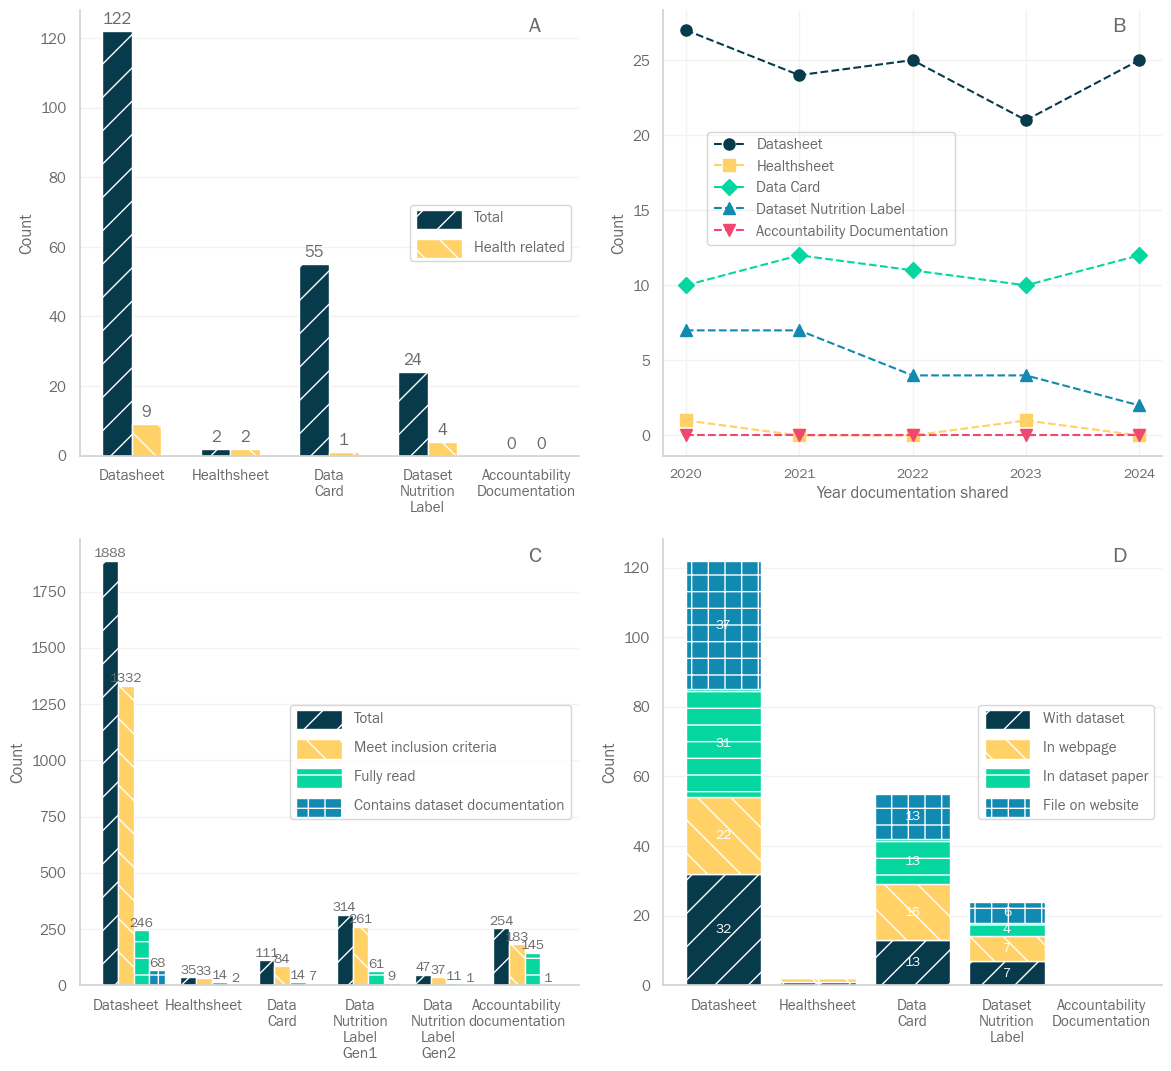

In [8]:
def get_axis_limits(ax):
    return (
        ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.9,
        ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.95,
    )


documentation_approach_list = [
    "Datasheet",
    "Healthsheet",
    "Data Card",
    "Dataset Nutrition Label",
    "Accountability Documentation",
]
fig, axs = plt.subplots(2, 2, figsize=(12, 11))

# Count per documentation approach
count_total = []
count_health_related = []
labels = []

for documentation_approach in documentation_approach_list:
    count_total.append(len(df[df["documentationApproach"] == documentation_approach]))
    count_health_related.append(
        len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["isHealthDataset"] == "yes")
            ]
        )
    )
    if len(documentation_approach.split()) > 1:
        documentation_approach = "\n".join(documentation_approach.split())
    labels.append(documentation_approach)

ax = axs[0, 0]
width = 0.3
x = np.arange(len(labels))
y_list = [count_total, count_health_related]
labels_list = ["Total", "Health related"]
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, padding=3, fontsize=12)
    count += 1

ax.set_xticks(x + width / 2, labels)
ax.set_ylabel("Count", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc="center right", labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.grid(axis="y", color="0.95")
ax.annotate("A", xy=get_axis_limits(ax))

# Evolution over year
year_list = list(
    range(df["yearDocumentationShared"].min(), df["yearDocumentationShared"].max() + 1)
)
count_rows = []
for year in year_list:
    row = [year]
    for documentation_approach in documentation_approach_list:
        count = len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["yearDocumentationShared"] == year)
            ]
        )
        row.append(count)
    count_rows.append(row)
df_year_count = pd.DataFrame(count_rows, columns=["Year"] + documentation_approach_list)

ax = axs[0, 1]
count = 0
for documentation_approach in documentation_approach_list:
    ax.plot(
        df_year_count["Year"],
        df_year_count[documentation_approach],
        "--",
        c=colors[count],
        marker=markers[count],
        markersize=8,
        label=documentation_approach,
    )
    count += 1

ax.grid(color="0.95")
ax.legend(fontsize=11, loc="center right", bbox_to_anchor=(0.6, 0.6))
ax.set_xticks(df_year_count["Year"])
ax.set_xticklabels(df_year_count["Year"], fontsize=10)
ax.set_xlabel("Year documentation shared", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_axisbelow(True)
ax.annotate("B", xy=get_axis_limits(ax))

# Method of dissemination
methods_list = list(set(df["howDocumentationDisseminated"]))
count_rows = []
for method in methods_list:
    row = [method]
    for documentation_approach in documentation_approach_list:
        count = len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["howDocumentationDisseminated"] == method)
            ]
        )
        row.append(count)
    count_rows.append(row)
df_method_count = pd.DataFrame(
    count_rows, columns=["Method"] + documentation_approach_list
)

ax = axs[1, 1]
width = 0.5
x = np.arange(len(labels))
bottom = np.zeros(5)
count = 0
for index, row in df_method_count.iterrows():
    method = row[0]
    y = row[1:]
    ax.bar(
        x, y, bottom=bottom, color=colors[count], hatch=patterns[count], label=method
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=10, color="white")

ax.set_xticks(x, labels, fontsize=11)
ax.set_ylabel("Count", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc="center right", labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.annotate("D", xy=get_axis_limits(ax))

# Method 2 citations analysis
labels_list = [
    "Total",
    "Meet inclusion criteria",
    "Fully read",
    "Contains dataset documentation",
]
relevant_columns = [
    "totalCitations",
    "meetInclusionCriteriaCount",
    "meetCodeCriteriaForFullReadCount",
    "containsDatasetDocumentationCount",
]
labels = []
for documentation_approach in list(df_citations["datasetDocumentationApproach"].values):
    if len(documentation_approach.split()) > 1:
        documentation_approach = "\n".join(documentation_approach.split())
    labels.append(documentation_approach)

ax = axs[1, 0]
width = 0.2
x = np.arange(len(labels))
for count in range(len(relevant_columns)):
    y = df_citations[relevant_columns[count]]
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, padding=1, fontsize=10)

ax.set_xticks(x + width, labels)
ax.set_ylabel("Count", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc="center right", labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.annotate("C", xy=get_axis_limits(ax))

fig.tight_layout()
fig.savefig("outputs/real_world_usage_overview.png", dpi=200)

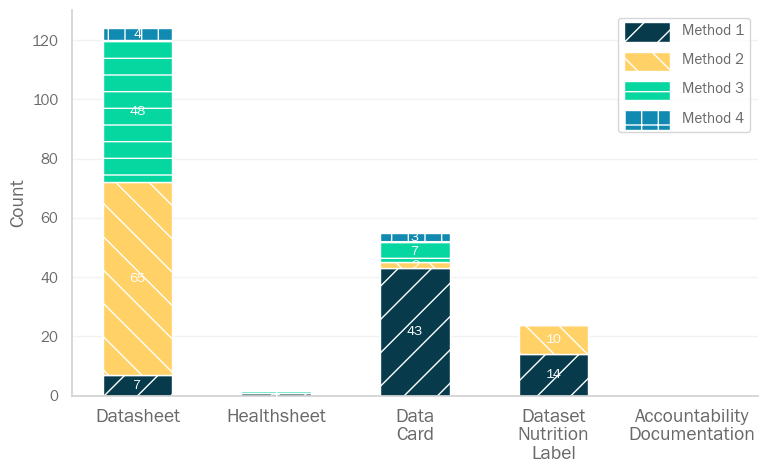

In [9]:
# Bonus
labels = []
count_method_1 = []
count_method_2 = []
count_method_3 = []
count_method_4 = []

for documentation_approach in documentation_approach_list:
    count_method_1.append(
        len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["searchMethod"].str.contains("1"))
            ]
        )
    )
    count_method_2.append(
        len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["searchMethod"].str.contains("2"))
            ]
        )
    )
    count_method_3.append(
        len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["searchMethod"].str.contains("3"))
            ]
        )
    )
    count_method_4.append(
        len(
            df[
                (df["documentationApproach"] == documentation_approach)
                & (df["searchMethod"].str.contains("4"))
            ]
        )
    )
    if len(documentation_approach.split()) > 1:
        documentation_approach = "\n".join(documentation_approach.split())
    labels.append(documentation_approach)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
width = 0.5
x = np.arange(len(labels))
y_list = [count_method_1, count_method_2, count_method_3, count_method_4]
labels_list = ["Method 1", "Method 2", "Method 3", "Method 4"]
bottom = np.zeros(5)
count = 0
for y in y_list:
    ax.bar(
        x,
        y,
        width,
        bottom=bottom,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=10, color="white")

ax.set_xticks(x, labels, fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_axisbelow(True)
leg = ax.legend(loc="upper right", labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")

fig.tight_layout()
fig.savefig("outputs/real_world_usage_method.png", dpi=200)